## Avacoda Project

### Description

#### Description about columns

### Importing Required Liberary

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

###  Import Dataset

In [167]:
import pandas as pd
df=pd.read_csv("AvacodoProject.csv")

In [168]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [169]:
# Checking the data dimension
df.shape

(1517, 14)

In [170]:
df.info() # This will give Index,Data type,Memory Location 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


####  Well as a first observation we are lucky  we can see that their is no missing  value inside the data set in which 1517 rows and 14 columns are present. Date and  Region column's datatype is object while remaining are flot and int type

In [171]:
df["Date"]=pd.to_datetime(df["Date"])
df["Month"]=df["Date"].apply(lambda x:x.month)
df["Day"]=df["Date"].apply(lambda x:x.day)



####  We add 3 more columns (date ,month ,year) in data set

In [172]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,13
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10,16
1513,11,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,9,10
1514,12,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,2,10
1515,13,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,9,25


In [173]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

####  We can see that their is no missing value in data set its more clear when we used this dataset on heat map

Text(0.5, 1.0, 'Null values')

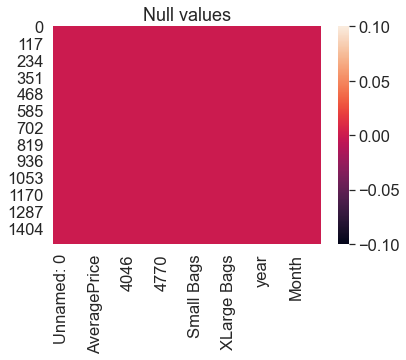

In [174]:
sns.heatmap(df.isnull())
plt.title("Null values")

#### From the heatmap we can usderstan moreclearly no null values present in data set which is good for model building

In [175]:
# Statistical Analysis
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


####  We can see that thier is lots of difference in max and min value of column . so we need scaling in data set after EDA. We also observed that thier is difference between in mean and standard deviation  of the some columns which indicate outliers and skewness present . We have to remove both of them after EDA for better model building.

### EDA:-Exploratory Data Analysis

####  Univarient Data Analysis


2015    1270
2016     247
Name: year, dtype: int64


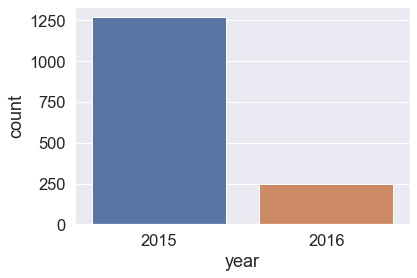

In [176]:

import seaborn as sns
ax=sns.countplot(x="year",data=df)
print(df["year"].value_counts())

#### we can see mostly retailer open in 2015 as comparision to 2016

conventional    1517
Name: type, dtype: int64


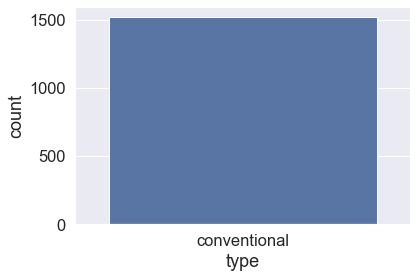

In [177]:
import seaborn as sns
ax=sns.countplot(x="type",data=df)
print(df["type"].value_counts())

#### Their is only one type of avacado is conventional type

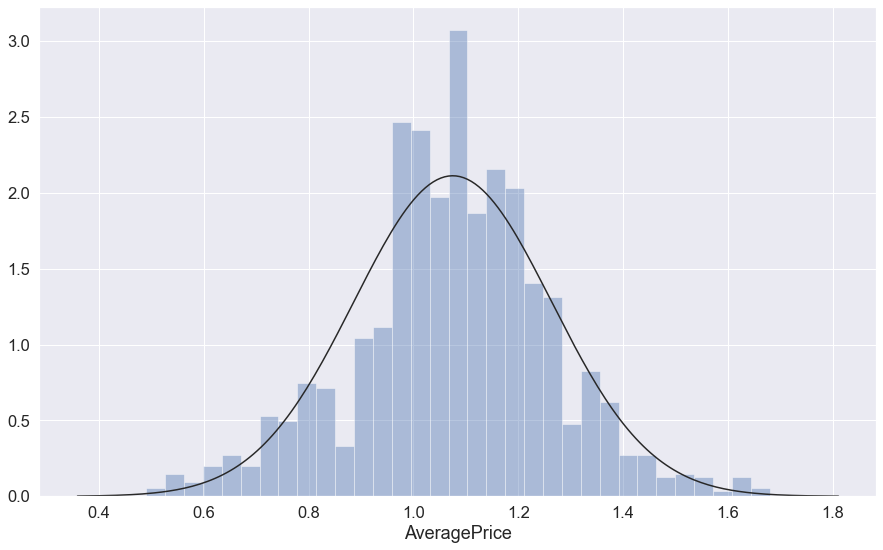

In [178]:
sns.set(font_scale=1.5)
from scipy.stats import norm
fig,ax=plt.subplots(figsize=(15,9))
sns.distplot(a=df.AveragePrice,kde=False,fit=norm)

####  We can see most of the avergae price between the 0.9 to 1.4. We also observed that their is so many outliers in Average Price and we have to removed it in further steps

#### Bivarrient Analysis

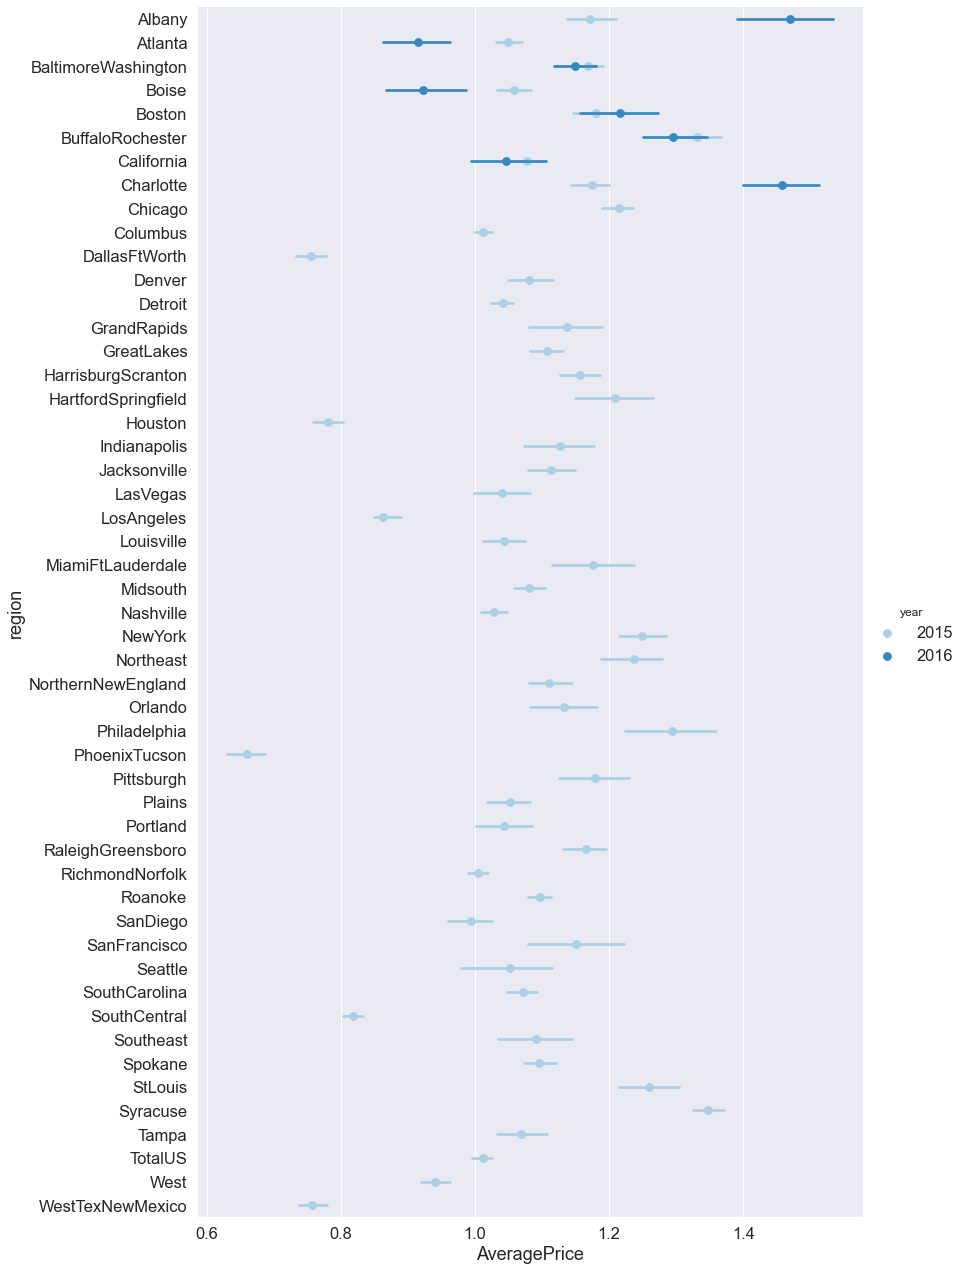

In [179]:
g=sns.factorplot("AveragePrice","region",data=df,hue="year",size=18,aspect=0.7,palette="Blues",join=False)

####  We observed that albany have more average price in 2016 as compare to other state in 2015 and 2016 

In [180]:
from sklearn.preprocessing import OrdinalEncoder
ec=OrdinalEncoder()

In [181]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=ec.fit_transform(df[i].values.reshape(-1,1))

In [182]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0.0,2015,0.0,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0.0,2015,0.0,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0.0,2015,0.0,12,13
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0.0,2015,0.0,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0.0,2016,7.0,10,16
1513,11,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0.0,2016,7.0,9,10
1514,12,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0.0,2016,7.0,2,10
1515,13,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0.0,2016,7.0,9,25


####  Multivarient Analysis

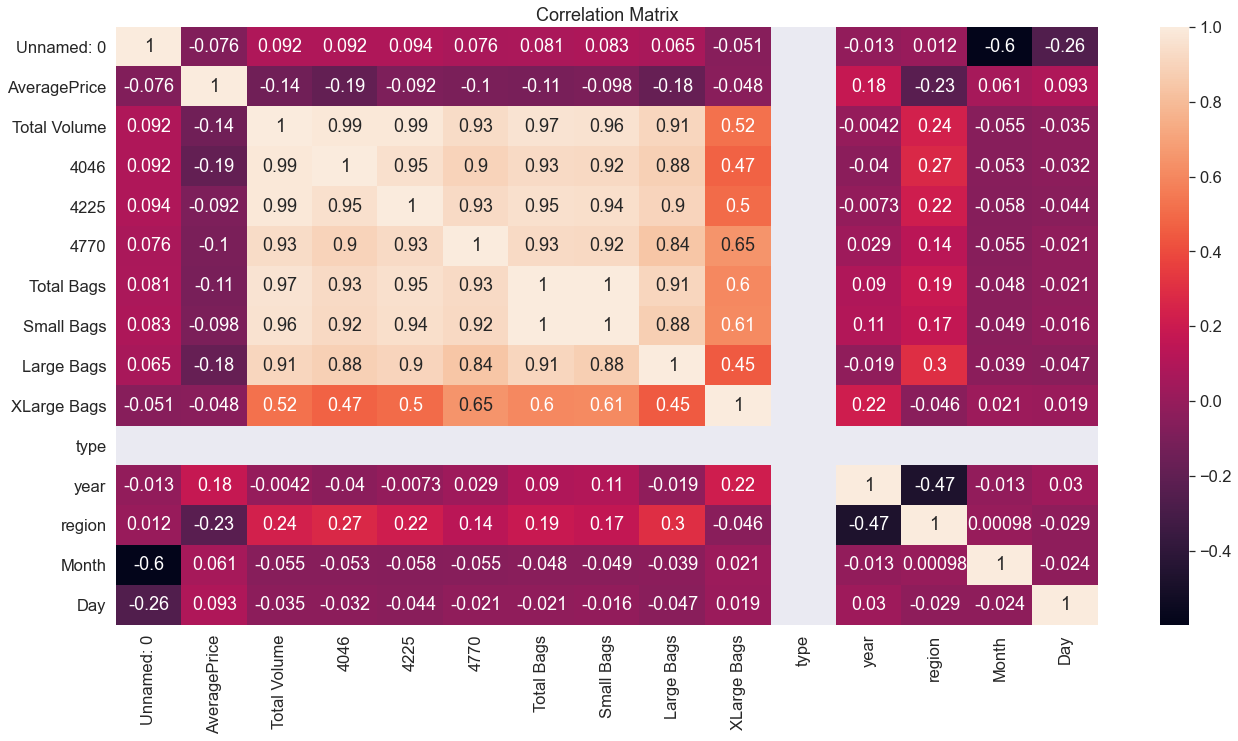

In [183]:
corr_mat=df.corr()
plt.figure(figsize=[22,11])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()


####  We can observed that most of the columns are not highly correlated with the target column avergae price .

### Feature Engineering

In [184]:
df_final=pd.get_dummies(df.drop(["region","Date","Unnamed: 0"],axis=1),drop_first=True)

In [185]:
df_final.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,11,29


### Data Cleansing

####  checking Skewness

In [186]:
df_final.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

####  We can see that thier are some columns Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,X Large Bags,Year, have skewness . By using power_transform we remove the skewness of columns

In [187]:
x=df[["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags","Month","Day"]]

In [188]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
Month          -0.139740
Day            -0.212528
dtype: float64

###  Checking Outliers

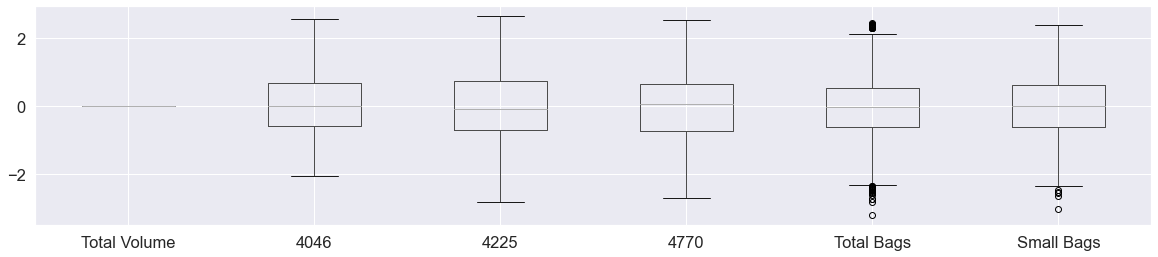

In [189]:
df_new.iloc[:,0:6].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.50)
plt.show()

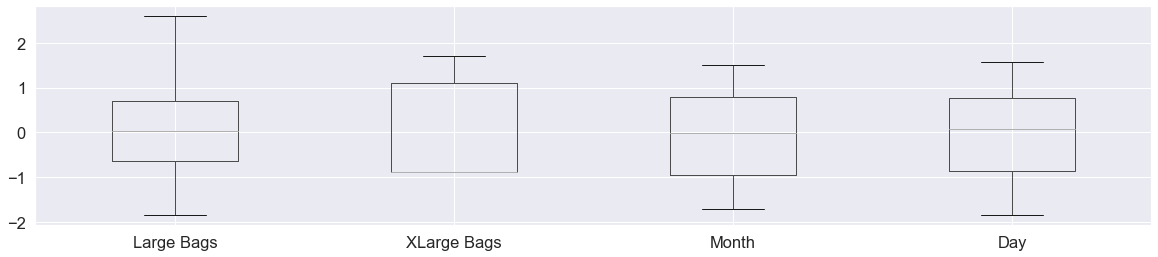

In [190]:
df_new.iloc[:,6:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.50)
plt.show()

####  We can see their is no outliers in columns 

###  Model Selection and Prediction

1> Now Our data is ready , lets apply our model which is going to the LinearRegression because our Target Variable is AveragePrice is continuous

2>Lets now begain to train our model. we will need to first split out our data into x array that contain input variable and y train that contain our target varibale

In [200]:
# Splitting the data into the independent and target variable into x and y
x=df_final.drop("AveragePrice",axis=1)
y=df_final["AveragePrice"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [202]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [203]:
from sklearn import metrics
print("MAE :-",metrics.mean_absolute_error(y_test,pred))
print("MSE :-",metrics.mean_squared_error(y_test,pred))
print("RMSE :-",np.sqrt(metrics.mean_squared_error(y_test,pred)))


MAE :- 0.1326690294329649
MSE :- 0.02905107037527031
RMSE :- 0.17044374548592361


####  RMSE is low so we can say that we do have a good model. but let check to be more sure


In [204]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [205]:
print("MAE :-",metrics.mean_absolute_error(y_test,pred))
print("MSE :-",metrics.mean_squared_error(y_test,pred))
print("RMSE :-",np.sqrt(metrics.mean_squared_error(y_test,pred)))


MAE :- 0.1326690294329649
MSE :- 0.02905107037527031
RMSE :- 0.17044374548592361


####  Both Regression model have approx same result of matrix

In [196]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [197]:
print("MAE :-",metrics.mean_absolute_error(y_test,pred))
print("MSE :-",metrics.mean_squared_error(y_test,pred))
print("RMSE :-",np.sqrt(metrics.mean_squared_error(y_test,pred)))


MAE :- 0.1326690294329649
MSE :- 0.02905107037527031
RMSE :- 0.17044374548592361


#### We can see RMSE have low value as compare to other two model . so we can say that RandomForestRegressor is best model

In [198]:

from sklearn.model_selection import GridSearchCV
parameters={"max_depth":np.arange(2,15),
           "criterion":["gini",'entropy']}

In [199]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)